In [83]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [84]:
df=pd.read_csv('file:///F:/adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [85]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

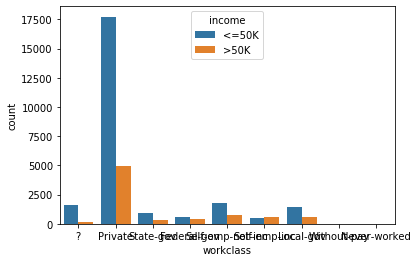

In [86]:
sns.countplot(df['workclass'],hue=df['income'])

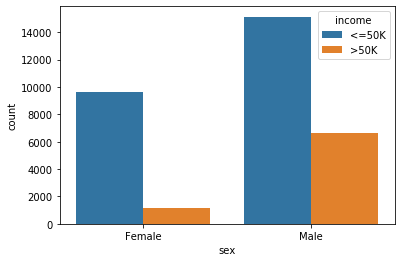

In [87]:
sns.countplot(df['sex'],hue=df['income'])

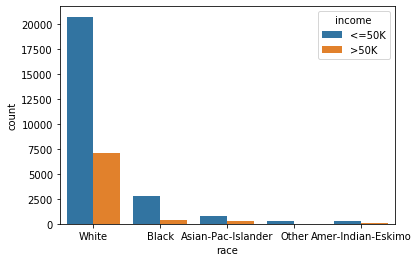

In [88]:
sns.countplot(df['race'],hue=df['income'])

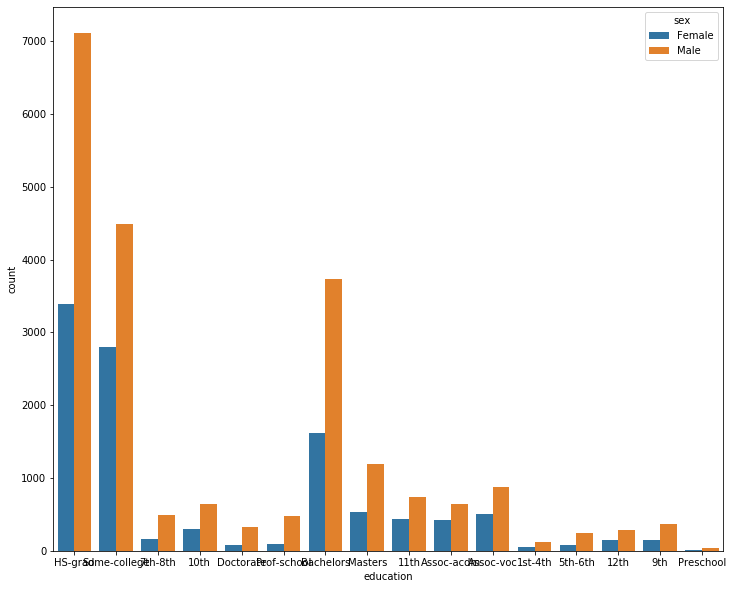

In [89]:
plt.figure(figsize=(12,10))
sns.countplot(df['education'],hue=df['sex'])

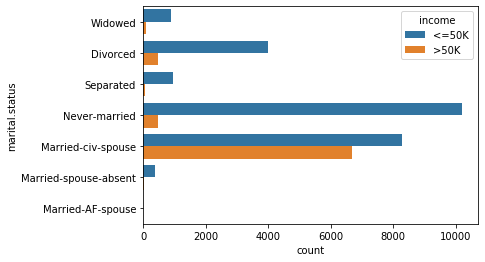

In [90]:
sns.countplot(y=df['marital.status'],hue=df['income'])

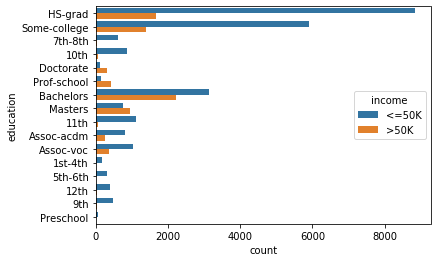

In [91]:
sns.countplot(y=df['education'],hue=df['income'])

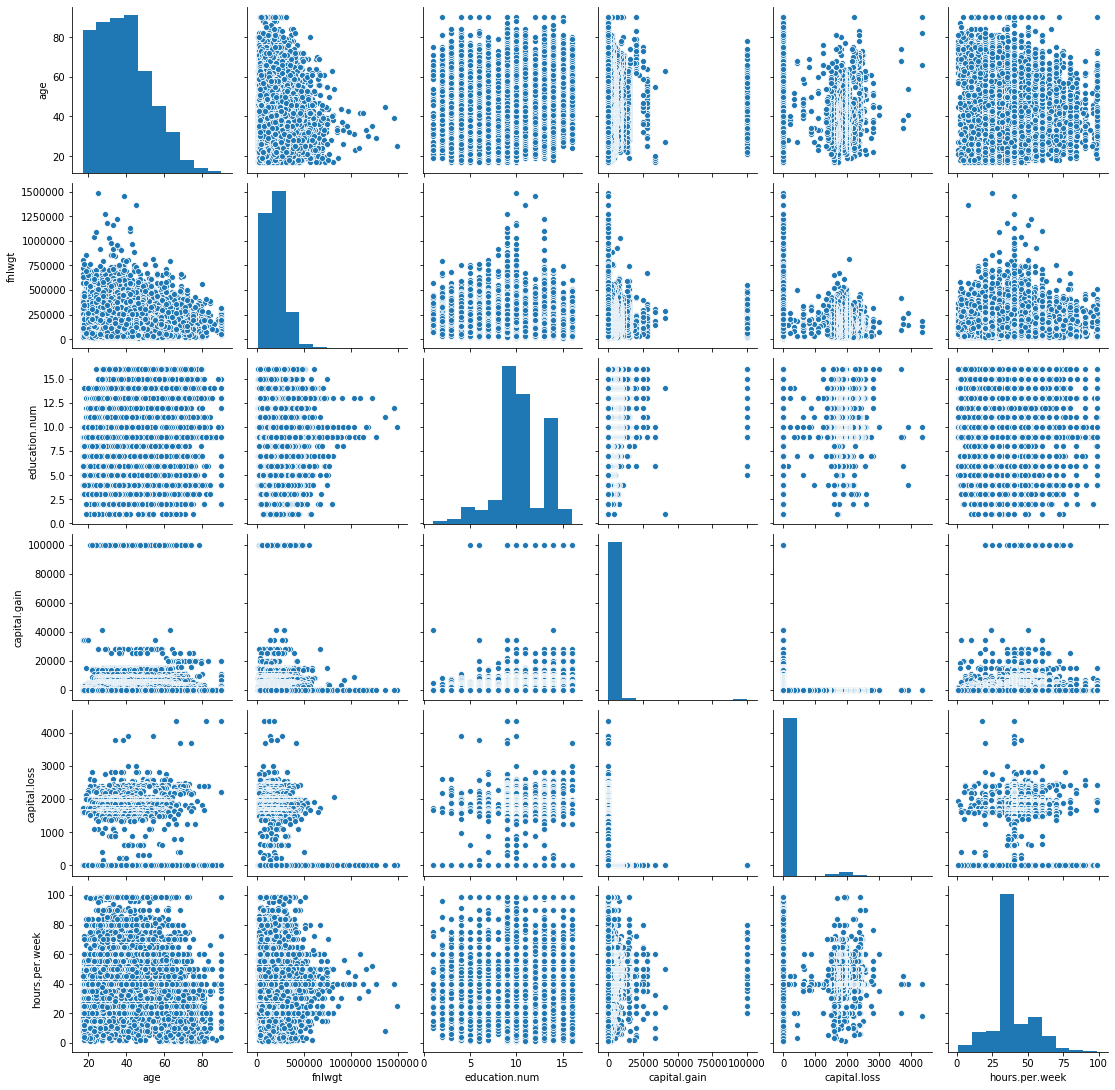

In [92]:
sns.pairplot(df)

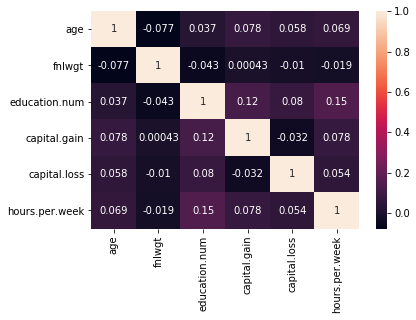

In [93]:
sns.heatmap(df.corr(),annot=True)

In [94]:
df['marital.status'].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [95]:
df['income'] = df['income'].replace({'<=50K':0, '>50K':1})
df['sex'] = df['sex'].replace({'Female':0, 'Male':1})
df['race'] = df['race'].replace({'White':0, 'Black':1, 'Asian-Pac-Islander':2, 'Other':3,'Amer-Indian-Eskimo':4})
df['workclass'] = df['workclass'].replace({'Private':0, 'State-gov':1, 'Federal-gov':2, 'Self-emp-not-inc':3,
       'Self-emp-inc':4, 'Local-gov':5, 'Without-pay':6, 'Never-worked':7})
df['native.country'] = df['native.country'].replace({'United-States':0, 'Private':1, 'Mexico':2, 'Greece':3, 'Vietnam':4, 'China':5,
       'Taiwan':6, 'India':7, 'Philippines':8, 'Trinadad&Tobago':9, 'Canada':10,
       'South':11, 'Holand-Netherlands':12, 'Puerto-Rico':13, 'Poland':14, 'Iran':15,
       'England':16, 'Germany':17, 'Italy':18, 'Japan':19, 'Hong':20, 'Honduras':21, 'Cuba':22,
       'Ireland':23, 'Cambodia':24, 'Peru':25, 'Nicaragua':26, 'Dominican-Republic':27,
       'Haiti':28, 'El-Salvador':29, 'Hungary':30, 'Columbia':31, 'Guatemala':32,
       'Jamaica':33, 'Ecuador':34, 'France':35, 'Yugoslavia':36, 'Scotland':37,
       'Portugal':38, 'Laos':39, 'Thailand':40, 'Outlying-US(Guam-USVI-etc)':41})
df['occupation'] = df['occupation'].replace({'Private':0, 'Exec-managerial':1, 'Machine-op-inspct':2,
       'Prof-specialty':3, 'Other-service':4, 'Adm-clerical':5, 'Craft-repair':6,
       'Transport-moving':7, 'Handlers-cleaners':8, 'Sales':9,
       'Farming-fishing':10, 'Tech-support':11, 'Protective-serv':12,
       'Armed-Forces':13, 'Priv-house-serv':14})
df['relationship'] = df['relationship'].replace({'Not-in-family':0, 'Unmarried':1, 'Own-child':2, 'Other-relative':3,
       'Husband':4, 'Wife':5})
df['education'] = df['education'].replace({'HS-grad':0, 'Some-college':1, '7th-8th':2, '10th':3, 'Doctorate':4,
       'Prof-school':5, 'Bachelors':6, 'Masters':7, '11th':8, 'Assoc-acdm':9,
       'Assoc-voc':10, '1st-4th':11, '5th-6th':12, '12th':13, '9th':14, 'Preschool':15})
df['marital.status'] = df['marital.status'].replace(['Never-married', 'Divorced', 'Separated', 'Widowed'], 'Single')
df['marital.status'] = df['marital.status'].replace(['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'], 'Married')
df['marital.status'] = df['marital.status'].map({'Married':1, 'Single':0})

In [96]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,0,9,0,?,0,0,0,0,4356,40,0,0
1,82,0,132870,0,9,0,1,0,0,0,0,4356,18,0,0
2,66,?,186061,1,10,0,?,1,1,0,0,4356,40,0,0
3,54,0,140359,2,4,0,2,1,0,0,0,3900,40,0,0
4,41,0,264663,1,10,0,3,2,0,0,0,3900,40,0,0


In [97]:
df=df.drop(['workclass'],axis='columns')

In [98]:
df=df.drop(['occupation'],axis='columns')

In [111]:
df=df.drop(['native.country'],axis='columns')

In [112]:
df

,age,fnlwgt,education,education.num,marital.status,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
0,90,77053,0,9,0,0,0,0,0,4356,40,0
1,82,132870,0,9,0,0,0,0,0,4356,18,0
2,66,186061,1,10,0,1,1,0,0,4356,40,0
3,54,140359,2,4,0,1,0,0,0,3900,40,0
4,41,264663,1,10,0,2,0,0,0,3900,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,1,10,0,0,0,1,0,0,40,0
32557,27,257302,9,12,1,5,0,0,0,0,38,0
32558,40,154374,0,9,1,4,0,1,0,0,40,1
32559,58,151910,0,9,0,1,0,0,0,0,40,0


In [113]:
df.tail()

,age,fnlwgt,education,education.num,marital.status,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
32556,22,310152,1,10,0,0,0,1,0,0,40,0
32557,27,257302,9,12,1,5,0,0,0,0,38,0
32558,40,154374,0,9,1,4,0,1,0,0,40,1
32559,58,151910,0,9,0,1,0,0,0,0,40,0
32560,22,201490,0,9,0,2,0,1,0,0,20,0


In [114]:
x=df.drop(['income'],axis=1)
y=df.income.values

In [115]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [116]:
df.relationship.value_counts()

4    13193
0     8305
2     5068
1     3446
5     1568
3      981
Name: relationship, dtype: int64

In [117]:
df.fnlwgt.value_counts()

123011    13
203488    13
164190    13
126675    12
121124    12
          ..
36376      1
78567      1
180407     1
210869     1
125489     1
Name: fnlwgt, Length: 21648, dtype: int64

In [118]:
li=LinearRegression()
li.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [119]:
li.score(xtest,ytest)

0.33661129065991097

In [120]:
lo=LogisticRegression()
lo.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [121]:
lo.score(xtest,ytest)

0.7935305558399017

In [122]:
tre=DecisionTreeClassifier()
tre.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [123]:
tre.score(xtest,ytest)

0.8078616030299929

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
rdf=RandomForestClassifier()
rdf.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [127]:
rdf.score(xtest,ytest)

0.8382638959975433

# MinMaxScaler

In [128]:
from sklearn.preprocessing import MinMaxScaler

In [129]:
mns=MinMaxScaler(feature_range=(0,1))

In [130]:
variable=mns.fit_transform(x)

In [131]:
variable

array([[1.        , 0.04398745, 0.        , ..., 0.        , 1.        ,
        0.39795918],
       [0.89041096, 0.08189579, 0.        , ..., 0.        , 1.        ,
        0.17346939],
       [0.67123288, 0.11802067, 0.06666667, ..., 0.        , 1.        ,
        0.39795918],
       ...,
       [0.31506849, 0.09650032, 0.        , ..., 0.        , 0.        ,
        0.39795918],
       [0.56164384, 0.09482688, 0.        , ..., 0.        , 0.        ,
        0.39795918],
       [0.06849315, 0.12849934, 0.        , ..., 0.        , 0.        ,
        0.19387755]])

# StandardScaler

In [132]:
from sklearn.preprocessing import StandardScaler

In [133]:
std=StandardScaler()

In [134]:
variable=std.fit_transform(x)

In [135]:
variable

array([[ 3.76961234, -1.06799736, -0.89667427, ..., -0.14592048,
        10.59350656, -0.03542945],
       [ 3.18311167, -0.53916866, -0.89667427, ..., -0.14592048,
        10.59350656, -1.81720429],
       [ 2.01011032, -0.03521956, -0.6368301 , ..., -0.14592048,
        10.59350656, -0.03542945],
       ...,
       [ 0.10398314, -0.33543266, -0.89667427, ..., -0.14592048,
        -0.21665953, -0.03542945],
       [ 1.42360965, -0.35877741, -0.89667427, ..., -0.14592048,
        -0.21665953, -0.03542945],
       [-1.21564337,  0.11095988, -0.89667427, ..., -0.14592048,
        -0.21665953, -1.65522476]])

# MultinomialNB

In [141]:
from sklearn.naive_bayes import MultinomialNB

In [142]:
model=MultinomialNB()
model.fit(xtrain,ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [143]:
model.score(xtest,ytest)

0.7759238407206469

# GaussianNB

In [144]:
from sklearn.naive_bayes import GaussianNB

In [145]:
ga=GaussianNB()
ga.fit(xtrain,ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [146]:
ga.score(xtrain,ytrain)

0.7977799227799228

# BernoulliNB

In [147]:
from sklearn.naive_bayes import BernoulliNB

In [150]:
ber=BernoulliNB()
ber.fit(xtrain,ytrain)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [151]:
ber.score(xtest,ytest)

0.7746954652472106

# SVC

In [153]:
from sklearn.svm import SVC

In [154]:
svc=SVC()
svc.fit(xtrain,ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [155]:
svc.score(xtest,ytest)

0.7874910430955062

# RandomForestClassifier

In [156]:
from sklearn.ensemble import RandomForestClassifier

In [157]:
rfc=RandomForestClassifier()
rfc.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [158]:
rfc.score(xtest,ytest)

0.8419490224178524